In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from train_model import SimpleNN
from mfbox import gokunet


In [2]:
# Check if GPU is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

Using device: cuda


In [3]:
# load input data
x_test = np.loadtxt("/home/yang/Desktop/GitReps/GokuEmu/data/narrow/matter_power_297_Box25_Part75_27_Box100_Part300_z0/test_input.txt")
# normalize input data
bounds = np.loadtxt("/home/yang/Desktop/GitReps/GokuEmu/data/narrow/matter_power_297_Box25_Part75_27_Box100_Part300_z0/input_limits.txt")
x_test = (x_test - bounds[:,0]) / (bounds[:,1] - bounds[:,0])

y_test = np.loadtxt("/home/yang/Desktop/GitReps/GokuEmu/data/narrow/matter_power_297_Box25_Part75_27_Box100_Part300_z0/test_output.txt")
y_test = 10**y_test


In [4]:
# load model
emu = gokunet(path_L1="models/pre_N_L1_z0/best_model.pth",path_L2="models/pre_N_L2_z0/best_model.pth",path_LH="models/pre_N_LH_z0/best_model.pth")

In [5]:
x_test

array([[0.02777778, 0.02777833, 0.361111  , 0.694445  , 0.027778  ,
        0.36111167, 0.69444445, 0.36111111, 0.52777786, 0.6944445 ],
       [0.47222222, 0.97222167, 0.916667  , 0.305555  , 0.638888  ,
        0.91666667, 0.19444447, 0.30555556, 0.25      , 0.63888888],
       [0.86111111, 0.41666667, 0.194444  , 0.41666625, 0.972222  ,
        0.194445  , 0.58333333, 0.75      , 0.86111143, 0.13888883],
       [0.19444444, 0.805555  , 0.527778  , 0.86111125, 0.916666  ,
        0.25      , 0.5277778 , 0.08333333, 0.80555571, 0.47222222],
       [0.52777778, 0.58333333, 0.25      , 0.58333375, 0.083334  ,
        0.75      , 0.13888887, 0.91666667, 0.41666643, 0.91666667],
       [0.75      , 0.194445  , 0.861111  , 0.0277775 , 0.472222  ,
        0.52777783, 0.91666667, 0.47222222, 0.30555571, 0.1944445 ],
       [0.13888889, 0.47222167, 0.694444  , 0.5277775 , 0.361112  ,
        0.08333333, 0.08333333, 0.69444444, 0.47222214, 0.08333333],
       [0.58333333, 0.694445  , 0.416667 

In [6]:
y_h_pred = emu.predict(x_test)
y_l1_pred = emu.predict_L1(x_test)
y_l2_pred = emu.predict_L2(x_test)

In [7]:
# re-scale the output from log scale back to normal scale
y_h_pred = 10**y_h_pred
y_l1_pred = 10**y_l1_pred
y_l2_pred = 10**y_l2_pred

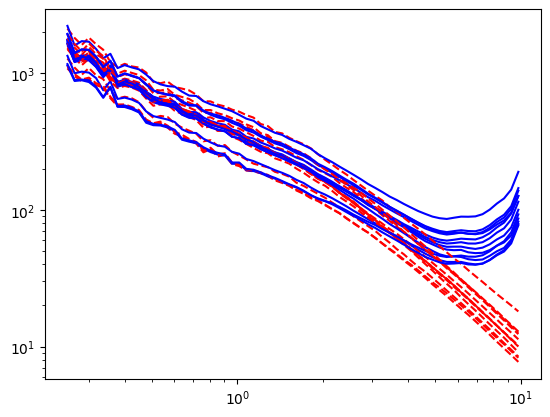

In [14]:
# Plot results
# plt.scatter(x, y, label="True Data")
# load k values
lgk = np.loadtxt("/home/yang/Desktop/GitReps/GokuEmu/data/narrow/matter_power_297_Box25_Part75_27_Box100_Part300_z0/kf.txt")
k = 10**lgk

# plot in log-log scale
plt.figure()

# loop over all the test data
for i in range(y_h_pred.shape[0]):
    plt.loglog(k, y_test[i], color="red", linestyle="--", label="True Data") 
    # plt.loglog(k, y_h_pred[i], color="red", label="NN Prediction")
    plt.loglog(k, y_l1_pred[i], color="blue", label="NN L1 Prediction")
# plt.legend()
plt.show()

In [9]:
k.max()

np.float64(9.825361078106937)

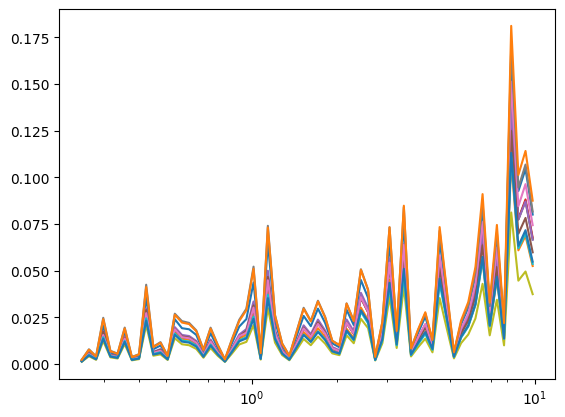

In [10]:
# plot ratio
plt.figure()

for i in range(y_h_pred.shape[0]):
    plt.semilogx(k, y_h_pred[i] / y_test[i])
# limit the y-axis
# plt.ylim(0.8, 1.2)
plt.show()

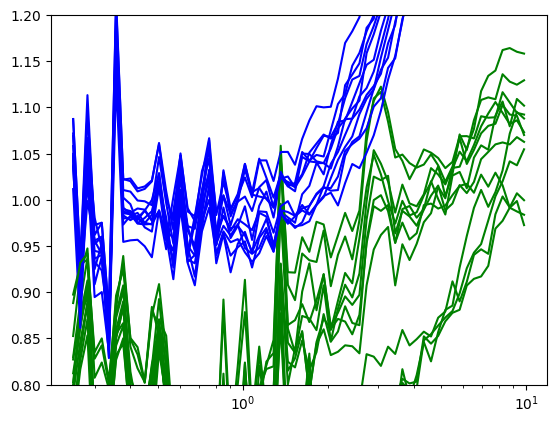

In [11]:
# plot ratio
plt.figure()

for i in range(y_h_pred.shape[0]):
    # plt.semilogx(k, y_h_pred[i] / y_test[i])
    plt.semilogx(k, y_l1_pred[i] / y_test[i], color="blue")
    plt.semilogx(k, y_l2_pred[i] / y_test[i], color="green")
# limit the y-axis
plt.ylim(0.8, 1.2)
plt.show()

In [12]:
# calculate relative mean absolute error
rel_err = np.mean(np.abs(y_h_pred - y_test) / y_test)
print("Relative Mean Absolute Error:", rel_err)

Relative Mean Absolute Error: 0.9772727835419915


In [13]:
# calculate mean square error (log scale)
mse = np.mean((np.log10(y_h_pred) - np.log10(y_test))**2)
print("Mean Square Error:", mse)

Mean Square Error: 3.681427779778453


In [17]:
# load HF training data
x_h = np.loadtxt("/home/yang/Desktop/GitReps/GokuEmu/data/narrow/matter_power_297_Box25_Part75_27_Box100_Part300_z0/train_input_fidelity_1.txt")
y_h = np.loadtxt("/home/yang/Desktop/GitReps/GokuEmu/data/narrow/matter_power_297_Box25_Part75_27_Box100_Part300_z0/train_output_fidelity_1.txt")
y_h = 10**y_h

In [18]:
# compare the prediction with the training data
y_h_pred = emu.predict(x_h)
y_h_pred = 10**y_h_pred

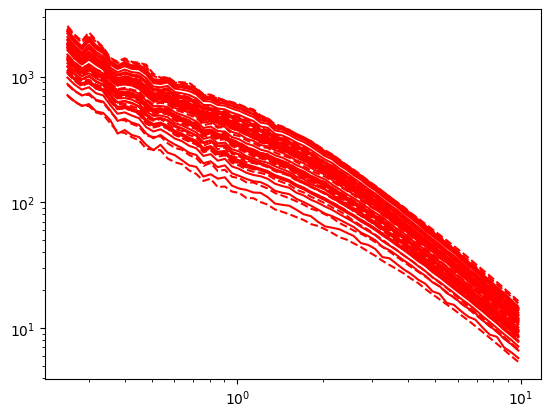

In [19]:


# plot in log-log scale
plt.figure()

# loop over all the test data 
for i in range(y_h_pred.shape[0]):
    plt.loglog(k, y_h[i], color="red", linestyle="--", label="True Data") 
    plt.loglog(k, y_h_pred[i], color="red", label="NN Prediction")
# plt.legend()
plt.show()


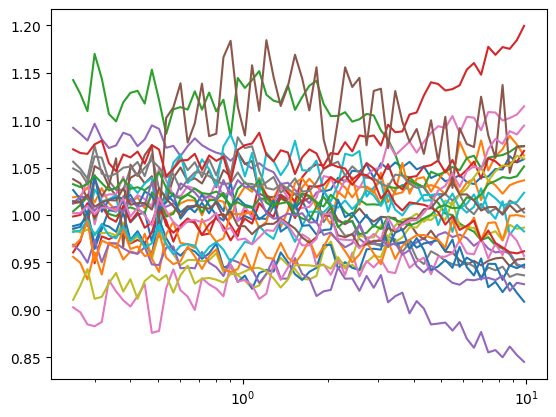

In [20]:
# plot ratio
plt.figure()

for i in range(y_h_pred.shape[0]):
    plt.semilogx(k, y_h_pred[i] / y_h[i])
# limit the y-axis
# plt.ylim(0.8, 1.2)
plt.show()